In [1]:
import os
import sys
sys.path.append(os.path.abspath("../src/"))
sys.path.append(os.path.abspath("../LHAPDF-files/"))
from tools import PDFs
import matplotlib.pyplot as plt
import numpy as np

LHAPDF 6.2.3 loading all 39 PDFs in set nCTEQ15WZdeut_pcj_p19_56_26
nCTEQ15WZdeut_pcj_p19_56_26, version 1; 39 PDF members
LHAPDF 6.2.3 loading all 47 PDFs in set DimuAllNeu_56_26
DimuAllNeu_56_26, version 1; 47 PDF members
LHAPDF 6.2.3 loading all 47 PDFs in set DimuAllNeu_1_1
DimuAllNeu_1_1, version 1; 47 PDF members


/tmp/ipykernel_54959/2595783180.py:18: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, data/data_cteq, color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_54959/2595783180.py:18: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, data/data_cteq, color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_54959/2595783180.py:18: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, data/data_cteq, color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_54959/2595783180.py:18: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, data/data_cteq, color=pdf[1], lineStyle=pdf[

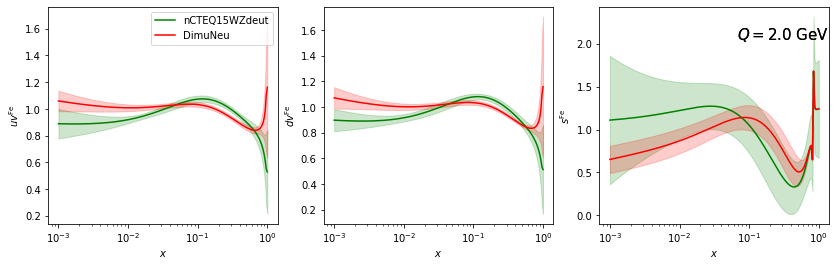

In [17]:

base = PDFs("nCTEQ15WZdeut_pcj_p19_56_26", "sym", 56, 26)
dimuneu = PDFs("DimuAllNeu_56_26", "sym", 56, 26)
CTEQ =PDFs("DimuAllNeu_1_1", "sym", 56, 26)
mypdfs = [ [base, "green", "-", "nCTEQ15WZdeut", True, True, 0.2], #pdf, color, linestyle, label, fullnuc, error, allpha
           [dimuneu, "red", "-", "DimuNeu", True, True, 0.2]
]

flavors = ["uv", "dv", "s"]
Q = 2.0
xlist = np.logspace(-3,-0.0000000001,200)
plt.figure(1,figsize=(14,4))
for iflv, flv in enumerate(flavors) :
    plt.subplot2grid((1,3),(0, iflv%3))   
    for pdf in mypdfs : 
        data, dp, dm = pdf[0].getPDFerrors(xlist, Q, flv, pdf[4])
        data_cteq, dpc, dmc = CTEQ.getPDFerrors(xlist, Q, flv, True)

        plt.plot(xlist, data/data_cteq, color=pdf[1], lineStyle=pdf[2], label = pdf[3])

        if (pdf[5]) : 
            plt.fill_between(xlist, (data+dp)/data_cteq, (data-dp)/data_cteq, color=pdf[1], alpha=pdf[6])

        plt.xscale("log")
        plt.xlabel('$x$',fontsize=10)
        plt.ylabel(r'${}^{{\mathrm{{Fe}}}}$'.format(flv),fontsize=10)
        if (iflv==0):
            plt.legend()
        if (iflv == 2) : 
            plt.annotate("$Q={}\ \mathrm{{GeV}}$".format(Q), xy=(0.6, 0.85), xycoords='axes fraction', fontsize=15)
plt.savefig("test.pdf", bbox_inches="tight")